In [1]:
from fp2graph import *
from shapely import Polygon
import skimage.measure as meas
from sklearn.cluster import KMeans
import plotly.express as px
import re
from enum import Enum

from helpers import *

In [2]:
PATH = 'plans/fp_ostwald11_f3_2.png'
f = FloorPlan2Graph(PATH)

In [3]:
[2]*3

[2, 2, 2]

In [4]:
f.image2tensor()
f.segment_tensor()

In [5]:
f.further_segment_doors()

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 2 Axes>)

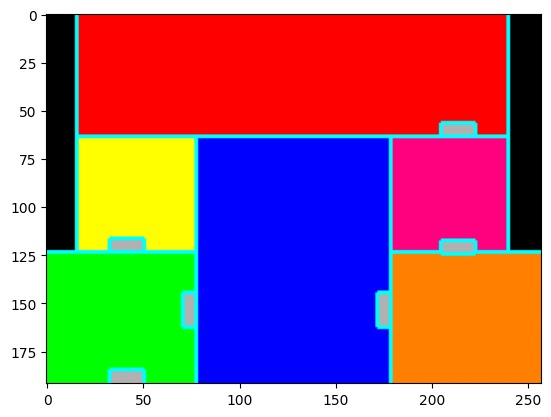

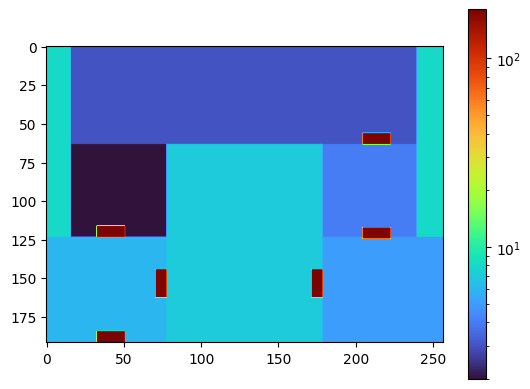

In [6]:
f.view_plan_segments()

In [7]:
f.array2shapely()

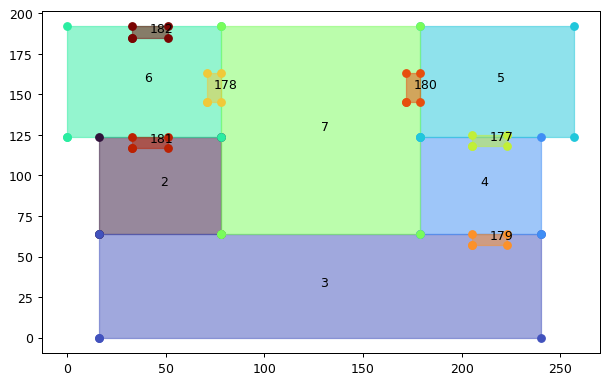

In [8]:
f.view_plan_shapely();

<module 'matplotlib.pyplot' from '/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

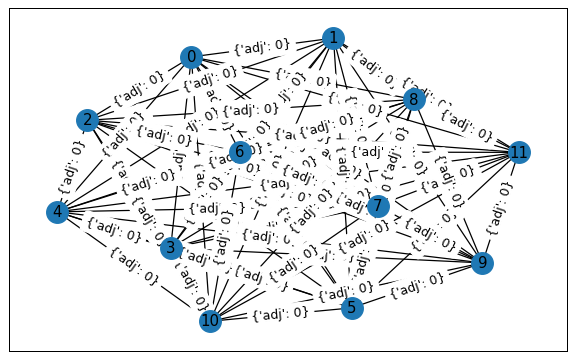

In [9]:
f.init_graph()
f.view_graph()

In [10]:
for node, attributes in f.CG.nodes(data=True):
    print(f"Node {node} attributes: {attributes}")

Node 0 attributes: {'type': <RegionType.ROOM: 0>, 'label': 2}
Node 1 attributes: {'type': <RegionType.ROOM: 0>, 'label': 3}
Node 2 attributes: {'type': <RegionType.ROOM: 0>, 'label': 4}
Node 3 attributes: {'type': <RegionType.ROOM: 0>, 'label': 5}
Node 4 attributes: {'type': <RegionType.ROOM: 0>, 'label': 6}
Node 5 attributes: {'type': <RegionType.ROOM: 0>, 'label': 7}
Node 6 attributes: {'type': <RegionType.DOOR: 1>, 'label': 177}
Node 7 attributes: {'type': <RegionType.DOOR: 1>, 'label': 178}
Node 8 attributes: {'type': <RegionType.DOOR: 1>, 'label': 179}
Node 9 attributes: {'type': <RegionType.DOOR: 1>, 'label': 180}
Node 10 attributes: {'type': <RegionType.DOOR: 1>, 'label': 181}
Node 11 attributes: {'type': <RegionType.DOOR: 1>, 'label': 182}


In [11]:
door_adj = []
door_adj_labels = []

for node_ix, attrs in f.CG.nodes(data=True):
    if attrs["type"] == RegionType.DOOR:
        neighbors = list(nx.bfs_edges(f.CG, source=node_ix, depth_limit=1))
        # print(attrs["label"], neighbors)
        for pair in neighbors:
            if f.CG.edges[pair]["adj"] == 0:
                ni = pair[0]
                nj = pair[1]
                adj_val = check_adjacency(
                    f.regions[ni].shape,
                    f.regions[nj].shape)
                if adj_val:
                    door_adj_labels.append(f.CG.nodes[ni]['label'], f.CG.nodes[nj]['label'])
                    
                    print(f.CG.nodes[ni]['type'], f.CG.nodes[nj]['type'])
                    print(f.CG.nodes[ni]['label'], f.CG.nodes[nj]['label'])
                
                f.CG.edges[pair]["adj"] = adj_val

RegionType.DOOR RegionType.ROOM
177 4
RegionType.DOOR RegionType.ROOM
177 5
RegionType.DOOR RegionType.ROOM
178 6
RegionType.DOOR RegionType.ROOM
178 7
RegionType.DOOR RegionType.ROOM
179 3
RegionType.DOOR RegionType.ROOM
179 4
RegionType.DOOR RegionType.ROOM
180 5
RegionType.DOOR RegionType.ROOM
180 7
RegionType.DOOR RegionType.ROOM
181 2
RegionType.DOOR RegionType.ROOM
181 6
RegionType.DOOR RegionType.ROOM
182 6


<module 'matplotlib.pyplot' from '/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

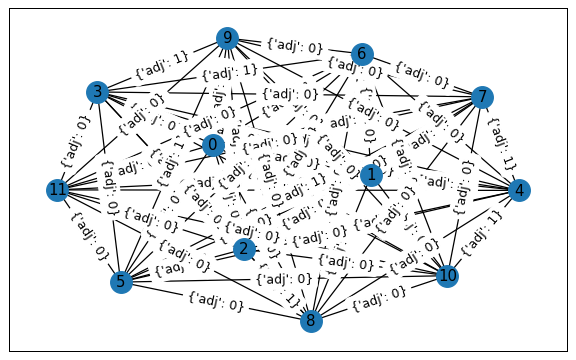

In [12]:
f.view_graph()

In [13]:
for n in f.CG.nodes:
    neighbors = list(nx.bfs_edges(f.CG, source=0, depth_limit=1))
    for pair in neighbors:
        if f.CG.edges[pair]["adj"] == 0:
            adj_val = check_adjacency(
                f.regions[pair[0]].shape,
                f.regions[pair[1]].shape)
            
            f.CG.edges[pair]["adj"] = adj_val
